In [1]:
import tensorflow as tf
from tensorflow import keras

In [6]:
(train_img,train_labels),(test_img,test_labels)=keras.datasets.mnist.load_data()

In [7]:
train_img=train_img/255.0
test_img=test_img/255.0

In [8]:
train_img.shape

(60000, 28, 28)

In [33]:
train_img=train_img.reshape(len(train_img),28,28,1)
test_img=test_img.reshape(len(test_img),28,28,1)

In [34]:
import matplotlib.pyplot as plt
def show_data(X, n=10, height=28, width=28, title=""):
    plt.figure(figsize=(20, 5))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(X[i].reshape((height,width)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

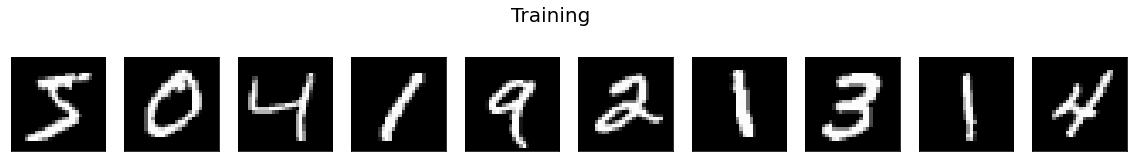

In [35]:
show_data(train_img,title="Training")

In [10]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [27]:
def build_model(hp):
    CNN_model=keras.Sequential([
        keras.layers.Conv2D(
                             filters=hp.Int("conv_1_filter",min_value=32,max_value=128,step=16),
                             activation="relu",
                             kernel_size=hp.Choice("conv_1_kernal_size", values=[3,5])),
        keras.layers.Conv2D(
                             filters=hp.Int("conv_2_filter",min_value=32,max_value=64,step=16),
                             activation="relu",
                             kernel_size=hp.Choice("conv_2_kernal_size", values=[3,5])),
        keras.layers.Flatten(),
        keras.layers.Dense(
                             units=hp.Int("Units",min_value=32,max_value=128,step=16),
                             activation="relu"),
        keras.layers.Dense(10,activation="softmax") ])
    CNN_model.compile(optimizer=keras.optimizers.Adam(hp.Choice("Learning_Rate",values=[.001,.0001])),
                     loss="sparse_categorical_crossentropy",
                     metrics=["accuracy"])
    return CNN_model

In [28]:
tuner_search=RandomSearch(hypermodel=build_model,objective="accuracy",max_trials=3,directory="output",
                         project_name="Mnist")

In [29]:
tuner_search.search(train_img,train_labels,epochs=2)


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
conv_1_filter     |64                |?                 
conv_1_kernal_size|3                 |?                 
conv_2_filter     |48                |?                 
conv_2_kernal_size|5                 |?                 
Units             |48                |?                 
Learning_Rate     |0.001             |?                 

Epoch 1/2
1875/1875 [==============================] - 494s 263ms/step - loss: 0.2258 - accuracy: 0.9320
Epoch 2/2
1875/1875 [==============================] - 506s 270ms/step - loss: 0.0381 - accuracy: 0.9886

Trial 1 Complete [00h 16m 39s]
accuracy: 0.9886833429336548

Best accuracy So Far: 0.9886833429336548
Total elapsed time: 00h 16m 39s

Search: Running Trial #2

Hyperparameter    |Value             |Best Value So Far 
conv_1_filter     |80                |64                
conv_1_kernal_size|3                 |3                 
conv_2_filter     |32         

In [30]:
tuner_search.results_summary()

Results summary
Results in output/Mnist
Showing 10 best trials
Objective(name='accuracy', direction='max')
Trial summary
Hyperparameters:
conv_1_filter: 64
conv_1_kernal_size: 3
conv_2_filter: 48
conv_2_kernal_size: 5
Units: 48
Learning_Rate: 0.001
Score: 0.9886833429336548
Trial summary
Hyperparameters:
conv_1_filter: 80
conv_1_kernal_size: 3
conv_2_filter: 32
conv_2_kernal_size: 5
Units: 64
Learning_Rate: 0.001
Score: 0.9885666370391846
Trial summary
Hyperparameters:
conv_1_filter: 32
conv_1_kernal_size: 5
conv_2_filter: 48
conv_2_kernal_size: 3
Units: 64
Learning_Rate: 0.0001
Score: 0.9787999987602234


In [31]:
model=tuner_search.get_best_models(num_models=1)[0]

In [32]:
model.fit(train_img,train_labels,epochs=5,initial_epoch=2)

Epoch 3/5
1875/1875 [==============================] - 469s 250ms/step - loss: 0.0208 - accuracy: 0.9933
Epoch 4/5
1875/1875 [==============================] - 467s 249ms/step - loss: 0.0122 - accuracy: 0.9957
Epoch 5/5
1875/1875 [==============================] - 485s 259ms/step - loss: 0.0109 - accuracy: 0.9967
